Análises estatísticas e Gráficos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.titlesize'] = 14

In [4]:
path_df = "../data/processed/dataset_not_null_features_removed_outliers"

In [5]:
df = pd.read_csv(path_df)

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'] , format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'] , format='%Y-%m-%d %H:%M:%S')

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,member,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,...,casual,same_place,0 days 01:08:47,68.783333,Thursday,False,18,19,0.026647,26.647146
2,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,...,casual,same_place,0 days 00:10:47,10.783333,Thursday,False,16,16,0.006598,6.597641
3,56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.903015,-87.683731,...,casual,same_place,0 days 00:41:27,41.450000,Thursday,False,17,18,0.012079,12.079038
4,EB6ABC5570C29B22,electric_bike,2020-08-26 20:14:02,2020-08-26 20:34:00,Cityfront Plaza Dr & Pioneer Ct,196.0,Dearborn St & Monroe St,49.0,41.890326,-87.621700,...,casual,different_place,0 days 00:19:58,19.966667,Wednesday,False,20,20,1.250438,1250.438215


## Análise Estatíticas

In [7]:
def analise_estatistica_completa(df):
    print("=== 📊 SUMMARY ===")
    print(f"Lines: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}\n")

    # 1. Verifing null values
    print("=== 🔍 NULL VALUES ===")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0] if nulls.any() else "Any null value founded.", "\n")

    # 2. Numerical Variables Analysis
    # (distance, duration, hours)
    cols_num = ['ride_duration_minutes', 'distance_km', 'distance_m', 'hour_start', 'hour_end']
    print("=== 📈 NUMERICAL STATISTICS ===")
    resumo_num = df[cols_num].describe().T
    # Adding median
    resumo_num['median'] = df[cols_num].median()
    print(resumo_num[['count', 'mean', 'std', 'min', 'median', 'max']], "\n")

    # 3. Categorical Variable Analysis
    cols_cat = ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name', 'week_day','round_trip']
    print("=== 🔠 CATEGORICAL ANALYSIS (Top 3 Values) ===")
    for col in cols_cat:
        top_values = df[col].value_counts().head(3)
        percent = (top_values / len(df) * 100).round(2)
        print(f"Column: {col}")
        for val, count in top_values.items():
            print(f"  - {val}: {count} ({percent[val]}%)")
    print("")

    # 4. Bools Variable Analysis
    cols_bool = ['is_weekend']
    print("=== 🚩 BOOLS DISTRIBUTION ===")
    for col in cols_bool:
        dist = df[col].value_counts(normalize=True) * 100
        print(f"{col}: {dist.get(True, 0):.2f}% Sim | {dist.get(False, 0):.2f}% Não")
    print("")

    # 5. Simple Detection Outliers (Using IQR for distance and time)
    print("=== 🚨 OUTLIERS (IQR) ===")
    for col in ['ride_duration_minutes', 'distance_km']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[df[col] > limite_superior].shape[0]
        print(f"{col}: {outliers} lines above {limite_superior:.2f} (Superior Limit)")
    print("")

In [8]:
analise_estatistica_completa(df)

=== 📊 SUMMARY ===
Lines: 523479
Columns: 22

=== 🔍 NULL VALUES ===
distance_km    835
distance_m     835
dtype: int64 

=== 📈 NUMERICAL STATISTICS ===
                          count         mean          std  min       median  \
ride_duration_minutes  523479.0    18.910544    17.133092  0.0    14.516667   
distance_km            522644.0     1.957801     1.502788  0.0     1.647392   
distance_m             522644.0  1957.801116  1502.788477  0.0  1647.391624   
hour_start             523479.0    14.427033     4.707213  0.0    15.000000   
hour_end               523479.0    14.607335     4.802208  0.0    15.000000   

                               max  
ride_duration_minutes   147.000000  
distance_km               6.759760  
distance_m             6759.759605  
hour_start               23.000000  
hour_end                 23.000000   

=== 🔠 CATEGORICAL ANALYSIS (Top 3 Values) ===
Column: rideable_type
  - docked_bike: 477087 (91.14%)
  - electric_bike: 46392 (8.86%)
Column: member_c

In [14]:
def insights(df):
    # 1. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: BEHAVIOR FOR ROUND TRIP (Mean):")
    insight_trip = df.groupby('round_trip')[['ride_duration_minutes', 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")

    # 2. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: MEMBER FOR ROUND TRIP (Mean):")
    insight_trip = df.groupby('member_casual')[['ride_duration_minutes', 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")

    # 3. Business Insight: How much of our clients goes to the same place at end
    print("\n🎯 INSIGHT: BEHAVIOR FOR RIDE DURANTION (Mean):")
    insight_trip = df.groupby('rideable_type')[['ride_duration_minutes', 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")
    

In [15]:
insights(df)


🎯 INSIGHT: BEHAVIOR FOR ROUND TRIP (Mean):
                 ride_duration_minutes  distance_km
round_trip                                         
different_place                  16.04         1.95
same_place                       39.42         2.04


🎯 INSIGHT: MEMBER FOR ROUND TRIP (Mean):
               ride_duration_minutes  distance_km
member_casual                                    
casual                         24.46         1.97
member                         14.74         1.95


🎯 INSIGHT: BEHAVIOR FOR RIDE DURANTION (Mean):
               ride_duration_minutes  distance_km
rideable_type                                    
docked_bike                    19.19         1.96
electric_bike                  16.04         1.97



## Análise visual Geral

In [16]:
def plot_distributions_and_volume(df):
    """Foco em preferências de uso e volume horário/rotas com destaque para fins de semana."""
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Preferência de Bicicleta por Tipo de Membro
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 0])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')
    
    # 2. Volume de Corridas por Hora do Dia
    hourly = df.groupby(['hour_start', 'member_casual']).size().reset_index(name='counts')
    sns.lineplot(data=hourly, x='hour_start', y='counts', hue='member_casual', marker='o', ax=axes[0, 1])
    axes[0, 1].set_title('Demanda Horária (Membros vs Casuais)')
    axes[0, 1].set_xticks(range(24))

    # 3. Viagens de Ida e Volta vs Ponto a Ponto
    sns.countplot(data=df, x='round_trip', hue='member_casual', ax=axes[1, 0])
    axes[1, 0].set_title('Tipo de Trajeto (Round Trip vs Different Place)')

    # 4. Quantidade de corridas ao longo do mês com destaque para FDS
    # Garantimos que a coluna 'day' existe para o agrupamento
    df['day'] = df['started_at'].dt.day
    daily_volume = df.groupby('day').size()
    
    # Plot da linha
    sns.lineplot(x=daily_volume.index, y=daily_volume.values, ax=axes[1, 1], color='darkred', linewidth=3, marker='o')
    
    # Lógica para destacar os Fins de Semana
    # Pegamos os números dos dias que são fim de semana no seu DF
    fds_days = df[df['is_weekend'] == True]['day'].unique()
    
    for day in fds_days:
        # Criamos uma sombra cinza clara atrás de cada dia de folga
        axes[1, 1].axvspan(day - 0.5, day + 0.5, color='gray', alpha=0.2, label='Fim de Semana' if day == fds_days[0] else "")

    axes[1, 1].set_title('Volume Total de Corridas ao Longo do Mês (Sombra = FDS)')
    axes[1, 1].set_xlabel('Dia do Mês')
    axes[1, 1].set_xticks(range(1, 32)) # Garante que todos os dias apareçam no eixo X
    
    # Adiciona a legenda para explicar a sombra, se houver
    if len(fds_days) > 0:
        axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

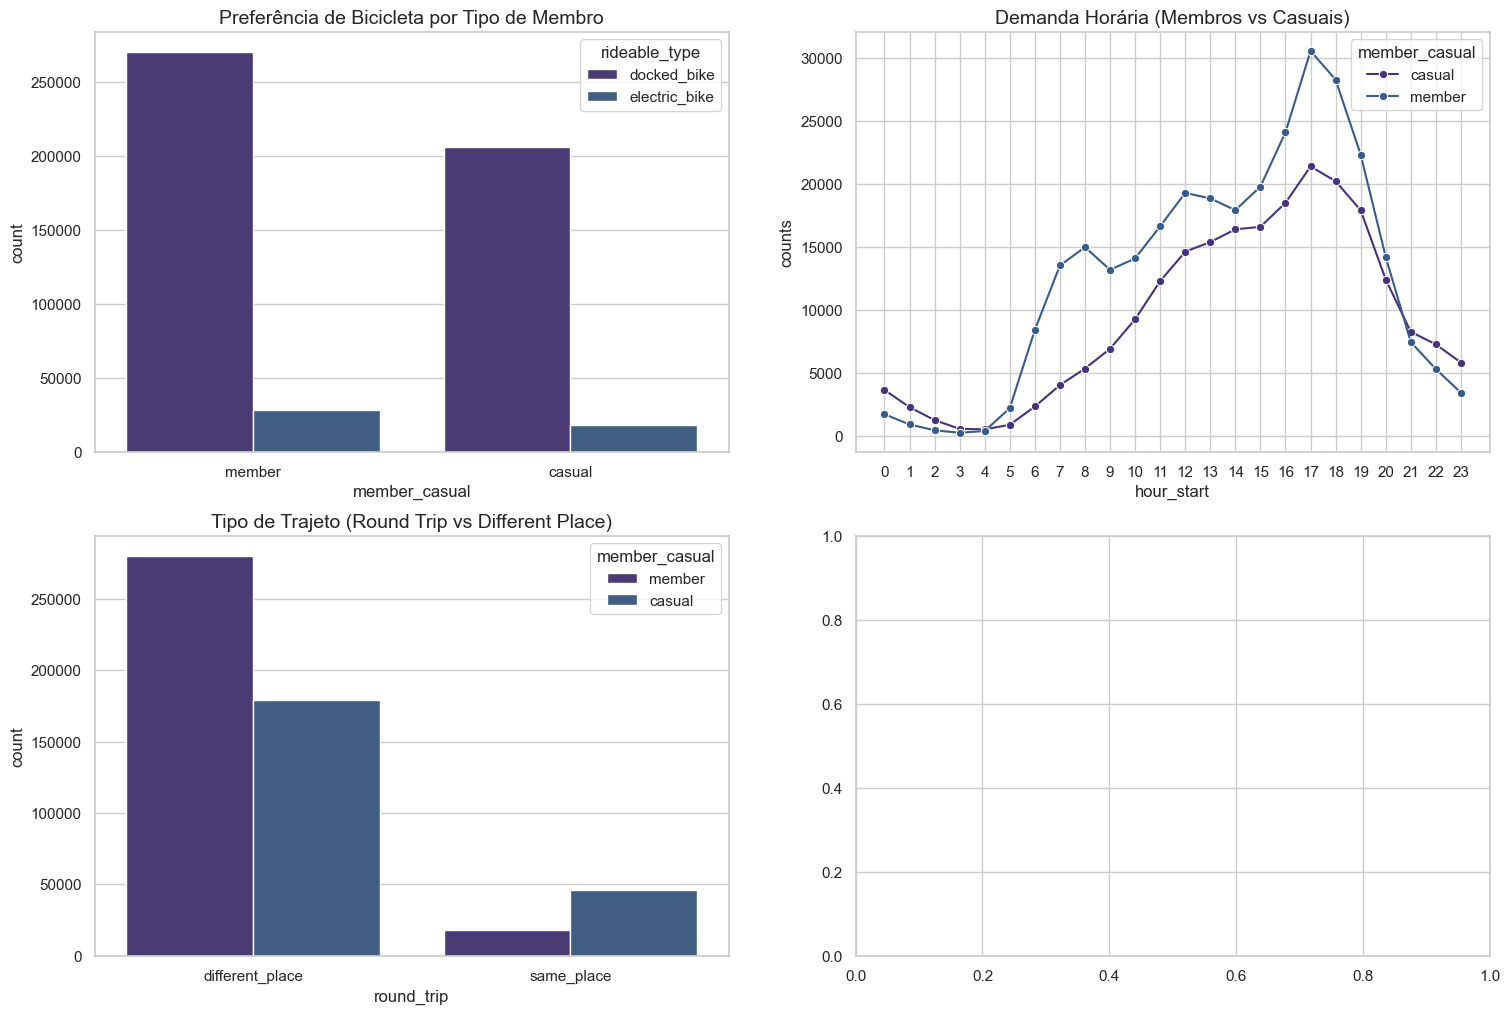

In [17]:
plot_distributions_and_volume(df)

In [18]:
def plot_performance_and_outliers(df):
    """Foco em Distância (KM), Duração e Outliers."""
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # 1. Relação KM vs Duração (Linha de Tendência)
    # Usamos lineplot com estimativa para não travar com 13k pontos
    sns.lineplot(data=df, x='distance_km', y='ride_duration_minutes', ax=axes[0, 0], color='teal')
    axes[0, 0].set_title('Relação: Distância (KM) vs Duração (Minutos)')

    # 2. KM por Tipo de Membro (Média)
    sns.barplot(data=df, x='member_casual', y='distance_km', ax=axes[0, 1], estimator=np.mean)
    axes[0, 1].set_title('Média de KM por Tipo de Membro')

    # 3. KM por Fim de Semana (is_weekend) dividido por Membro
    sns.barplot(data=df, x='is_weekend', y='distance_km', hue='member_casual', ax=axes[1, 0])
    axes[1, 0].set_title('Média de KM: Fim de Semana vs Dias Úteis')
    axes[1, 0].set_xticklabels(['Dia Útil', 'Fim de Semana'])

    # 4. Outliers de Duração e KM (Boxplots combinados)
    # Criamos um "melt" para colocar os dois no mesmo gráfico de eixos diferentes ou lado a lado
    # Aqui vamos de abordagem simples com boxplot de KM para não poluir
    sns.boxplot(data=df, x='member_casual', y='distance_km', ax=axes[1, 1])
    axes[1, 1].set_title('Distribuição e Outliers de Distância (KM)')

    plt.tight_layout()
    plt.show()

    # Gráfico extra para Outliers de Duração (separado para escala ser diferente)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes', palette='Set2')
    plt.title('Outliers: Duração da Corrida (Minutos)')
    plt.show()

In [ ]:
plot_performance_and_outliers(df)

In [ ]:
def plot_correlation_heatmap(df):
    """Mapa de calor para entender correlações."""
    plt.figure(figsize=(10, 8))
    cols = ['ride_duration_minutes', 'distance_km', 'hour_start', 'is_weekend', 'hour_end']
    corr = df[cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Máscara para ver só metade (opcional)
    
    sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=.5)
    plt.title('Heatmap de Correlação de Variáveis')
    plt.show()

In [ ]:
plot_correlation_heatmap(df)

In [ ]:
def plot_bike_analysis(df):
    # Configuração de estilo
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (18, 12)
    
    # Criando o grid de subplots (4 linhas e 2 colunas)
    fig, axes = plt.subplots(4, 2)
    fig.suptitle('Análise Visual de Dados de Mobilidade', fontsize=20, fontweight='bold')

    # 1. Distribuição: Tipo de Usuário e Tipo de Bicicleta (Barra)
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 0])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')

    # 2. 
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 1])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')
    
    # 2. Outliers: Duração da Corrida (Boxplot)
    # Filtramos valores extremos para o gráfico não ficar ilegível
    sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes', ax=axes[0, 1])
    axes[0, 1].set_title('Outliers: Duração da Corrida (min)')

    # 3. Demanda: Volume de corridas por Hora (Linha/Área)
    # Comparando quando membros vs casuais usam as bikes
    hourly_counts = df.groupby(['hour_start', 'member_casual']).size().reset_index(name='count')
    sns.lineplot(data=hourly_counts, x='hour_start', y='count', hue='member_casual', marker='o', ax=axes[1, 0])
    axes[1, 0].set_title('Volume de Corridas por Hora do Dia')
    axes[1, 0].set_xticks(range(0, 24))

    # 4. Comportamento: Round Trip vs Diferent Place (Barra)
    sns.countplot(data=df, x='round_trip', hue='member_casual', ax=axes[1, 1])
    axes[1, 1].set_title('Viagens de Ida e Volta vs Ponto a Ponto')

    # 5. Outliers: Distância percorrida (Boxplot)
    sns.boxplot(data=df, x='member_casual', y='distance_km', ax=axes[2, 0])
    axes[2, 0].set_title('Outliers: Distância Percorrida (km)')

    # 6. Heatmap de Correlação
    # Selecionamos apenas as colunas numéricas relevantes
    cols_corr = ['ride_duration_minutes', 'distance_km', 'hour_start', 'is_weekend']
    corr_matrix = df[cols_corr].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])
    axes[2, 1].set_title('Heatmap de Correlação entre Métricas')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
plot_bike_analysis(df)

## Análise das Estações

In [ ]:
def analise_estacoes_completa(df):
    print("=== 🚉 ANÁLISE ESTRATÉGICA DE ESTAÇÕES ===")
    
    # 1. Top 10 Estações de Início e Fim
    top_start = df['start_station_name'].value_counts().head(10)
    top_end = df['end_station_name'].value_counts().head(10)

    # 2. As Rotas Mais Frequentes (Caminho completo)
    # Criamos uma coluna temporária de rota para facilitar
    df['route'] = df['start_station_name'] + " ➔ " + df['end_station_name']
    top_routes = df['route'].value_counts().head(10)

    # 3. Análise de Fluxo (Balance)
    # Quantas saíram vs Quantas chegaram em cada estação
    starts = df['start_station_name'].value_counts()
    ends = df['end_station_name'].value_counts()
    
    flow = pd.DataFrame({'Saídas': starts, 'Chegadas': ends}).fillna(0)
    flow['Saldo'] = flow['Chegadas'] - flow['Saídas']
    # Estações que mais "perdem" bikes (Saldo negativo) e as que mais "ganham" (Saldo positivo)
    mais_ganham = flow.sort_values(by='Saldo', ascending=False).head(5)
    mais_perdem = flow.sort_values(by='Saldo', ascending=True).head(5)

    # --- VISUALIZAÇÃO ---
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Gráfico 1: Top Start Stations
    sns.barplot(y=top_start.index, x=top_start.values, ax=axes[0, 0], palette='viridis')
    axes[0, 0].set_title('Top 10 Estações de Partida')

    # Gráfico 2: Top End Stations
    sns.barplot(y=top_end.index, x=top_end.values, ax=axes[0, 1], palette='magma')
    axes[0, 1].set_title('Top 10 Estações de Chegada')

    # Gráfico 3: Rotas mais populares
    sns.barplot(y=top_routes.index, x=top_routes.values, ax=axes[1, 0], palette='rocket')
    axes[1, 0].set_title('Top 10 Rotas Mais Frequentes')

    # Gráfico 4: Saldo de Bicicletas (Top 5 Ganham vs Top 5 Perdem)
    balance_plot = pd.concat([mais_ganham, mais_perdem])
    sns.barplot(y=balance_plot.index, x=balance_plot['Saldo'], ax=axes[1, 1], palette='coolwarm')
    axes[1, 1].set_title('Saldo de Bikes (Chegadas - Saídas)')
    axes[1, 1].set_xlabel('Saldo Negativo = Estação esvaziando | Positivo = Acumulando')

    plt.tight_layout()
    plt.show()

    # Deletar a coluna temporária para não sujar o DF original
    df.drop(columns=['route'], inplace=True)

In [ ]:
analise_estacoes_completa(df)